In [1]:
from google.colab import drive
#drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import os

data_dir = '/content/drive/MyDrive/datasets'


In [ ]:
import xarray as xr
import os
import glob

data_dir = '/content/drive/MyDrive/datasets/'  # or your actual folder path
file_pattern = os.path.join(data_dir, '*.nc4')

matched_files = glob.glob(file_pattern)
print("Matched files:", matched_files)

ds = xr.open_mfdataset(matched_files, combine='by_coords')
ndvi = ds['ndvi']


Matched files: ['/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2021_0712.nc4', '/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2020_0106.nc4', '/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2022_0106.nc4', '/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2021_0106.nc4', '/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2022_0712.nc4', '/content/drive/MyDrive/datasets/ndvi3g_geo_v1_2_2020_0712.nc4']


In [ ]:
print(ds)


<xarray.Dataset> Size: 5GB
Dimensions:     (time: 72, nv: 2, lat: 2160, lon: 4320)
Coordinates:
  * time        (time) datetime64[ns] 576B 2020-01-08 2020-01-24 ... 2022-12-24
  * lon         (lon) float64 35kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat         (lat) float64 17kB 89.96 89.88 89.79 ... -89.79 -89.88 -89.96
Dimensions without coordinates: nv
Data variables:
    crs         (time) int32 288B -32768 -32768 -32768 ... -32768 -32768 -32768
    time_bnds   (time, nv) datetime64[ns] 1kB dask.array<chunksize=(12, 2), meta=np.ndarray>
    satellites  (time) float32 288B dask.array<chunksize=(12,), meta=np.ndarray>
    ndvi        (time, lat, lon) float32 3GB dask.array<chunksize=(2, 540, 1080), meta=np.ndarray>
    percentile  (time, lat, lon) float32 3GB dask.array<chunksize=(2, 540, 1080), meta=np.ndarray>
Attributes: (12/19)
    publisher_type:         institution
    publisher_institution:  Oak Ridge National Laboratory Distributed Active ...
    publisher_url:      

In [ ]:
print(ndvi['time'].values)




['2020-01-08T00:00:00.000000000' '2020-01-24T00:00:00.000000000'
 '2020-02-08T00:00:00.000000000' '2020-02-22T00:00:00.000000000'
 '2020-03-08T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-04-08T00:00:00.000000000' '2020-04-23T00:00:00.000000000'
 '2020-05-08T00:00:00.000000000' '2020-05-24T00:00:00.000000000'
 '2020-06-08T00:00:00.000000000' '2020-06-23T00:00:00.000000000'
 '2020-07-08T00:00:00.000000000' '2020-07-24T00:00:00.000000000'
 '2020-08-08T00:00:00.000000000' '2020-08-24T00:00:00.000000000'
 '2020-09-08T00:00:00.000000000' '2020-09-23T00:00:00.000000000'
 '2020-10-08T00:00:00.000000000' '2020-10-24T00:00:00.000000000'
 '2020-11-08T00:00:00.000000000' '2020-11-23T00:00:00.000000000'
 '2020-12-08T00:00:00.000000000' '2020-12-24T00:00:00.000000000'
 '2021-01-08T00:00:00.000000000' '2021-01-24T00:00:00.000000000'
 '2021-02-08T00:00:00.000000000' '2021-02-22T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-03-24T00:00:00.000000000'
 '2021-04-08T00:00:00.000

In [ ]:
ndvi_filtered = ndvi.sel(time=slice('2020-01-01', '2022-12-31'))


In [ ]:
ndvi_annual = ndvi_filtered.groupby('time.year').mean(dim='time')
print(ndvi_annual)


<xarray.DataArray 'ndvi' (year: 3, lat: 2160, lon: 4320)> Size: 112MB
dask.array<stack, shape=(3, 2160, 4320), dtype=float32, chunksize=(1, 540, 1080), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 35kB -180.0 -179.9 -179.8 ... 179.8 179.9 180.0
  * lat      (lat) float64 17kB 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * year     (year) int64 24B 2020 2021 2022
Attributes:
    units:          1
    scale:          x 10000
    valid_range:    [-0.3  1. ]
    standard_name:  normalized_difference_vegetation_index
    long_name:      maximum normalized difference vegetation index (NDVI) ove...
    description:    pixels with ndvi = -5000 should be treated as missing data


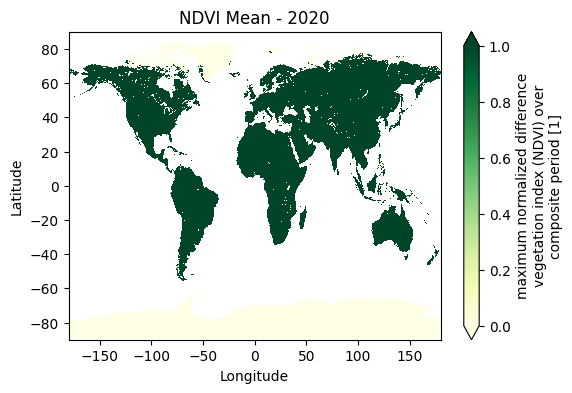

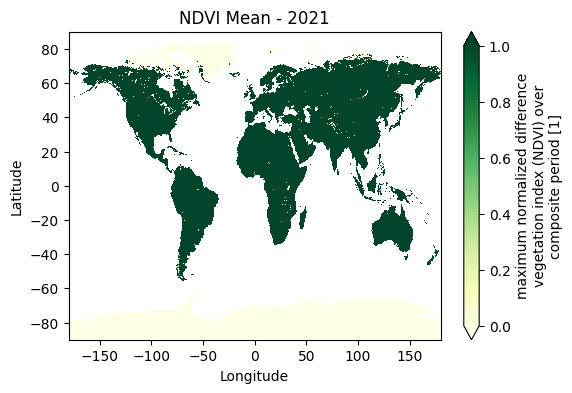

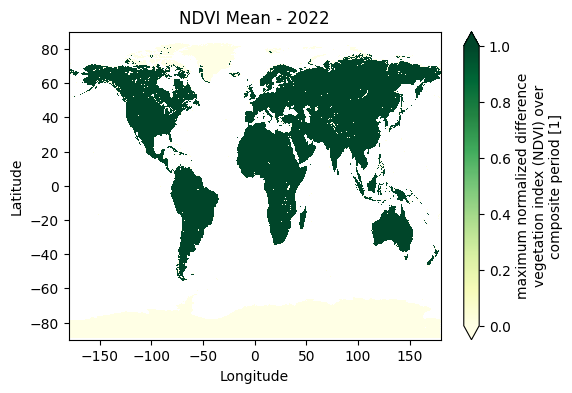

In [ ]:
import matplotlib.pyplot as plt

years = ndvi_annual.year.values
for i, year in enumerate(years):
    plt.figure(figsize=(6, 4))
    ndvi_annual.sel(year=year).plot(cmap='YlGn', vmin=0, vmax=1)
    plt.title(f'NDVI Mean - {year}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


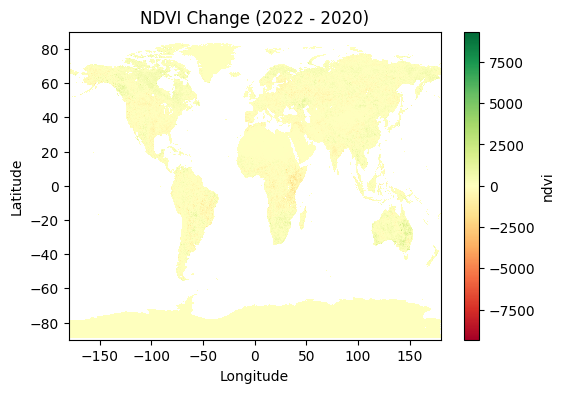

In [ ]:
ndvi_change = ndvi_annual.sel(year=2022) - ndvi_annual.sel(year=2020)

plt.figure(figsize=(6, 4))
ndvi_change.plot(cmap='RdYlGn', center=0)
plt.title('NDVI Change (2022 - 2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
import numpy as np
import xarray as xr

# Simple threshold classification
classified_change = xr.where(ndvi_change > 0.05, 1,   # vegetation increased
                      xr.where(ndvi_change < -0.05, -1,  # vegetation decreased
                               0))  # no significant change


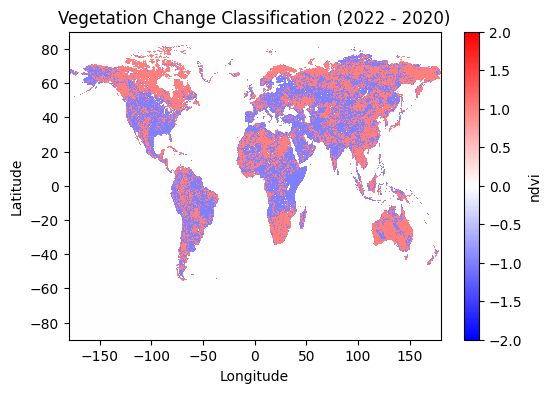

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
classified_change.plot(cmap='bwr', vmin=-2, vmax=2, add_colorbar=True)
plt.title('Vegetation Change Classification (2022 - 2020)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
pip install rioxarray rasterio


In [ ]:
import rioxarray  # activate rioxarray extension

classified_change.rio.set_spatial_dims(x_dim='lon', y_dim='lat', inplace=True)
classified_change.rio.write_crs("EPSG:4326", inplace=True)
classified_change.rio.to_raster("/content/classified_ndvi_change.tif")


In [ ]:
df = classified_change.to_dataframe(name='change').reset_index()
df.to_csv('/content/ndvi_change_classified.csv', index=False)


In [ ]:
df

,lat,lon,spatial_ref,change
0,89.958333,-179.958333,0,0
1,89.958333,-179.875000,0,0
2,89.958333,-179.791667,0,0
3,89.958333,-179.708333,0,0
4,89.958333,-179.625000,0,0
...,...,...,...,...
9331195,-89.958333,179.625000,0,0
9331196,-89.958333,179.708333,0,0
9331197,-89.958333,179.791667,0,0
9331198,-89.958333,179.875000,0,0


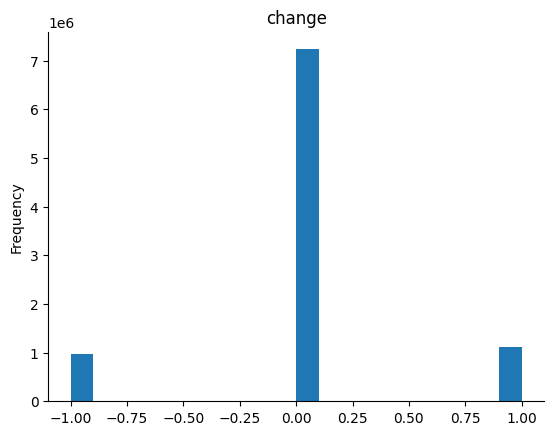

In [ ]:
from matplotlib import pyplot as plt
df['change'].plot(kind='hist', bins=20, title='change')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import files
#files.download('/content/ndvi_change_classified.csv')


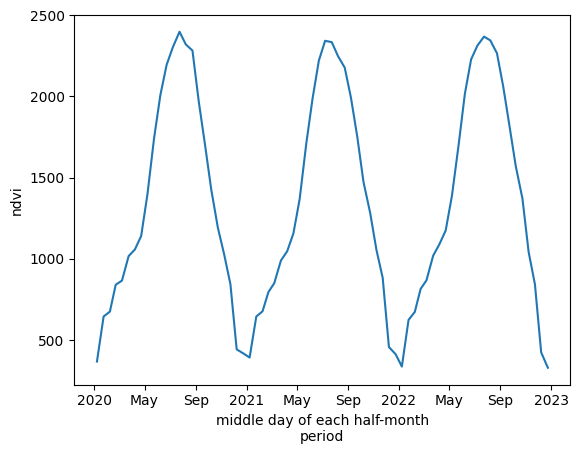

In [ ]:
ndvi_mean = ndvi.mean(dim=['lat', 'lon'])
ndvi_mean.plot()


In [ ]:

ndvi_series = ndvi_mean.to_series().dropna()
ndvi_series

,ndvi
time,
2020-01-08,366.486206
2020-01-24,644.001831
2020-02-08,673.982239
2020-02-22,839.664185
2020-03-08,865.238708
...,...
2022-10-24,1371.437500
2022-11-08,1040.169067
2022-11-23,842.410278


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
ndvi_scaled = scaler.fit_transform(ndvi_series.values.reshape(-1, 1))

In [ ]:
print(ndvi.time.values)  # check available timestamps


['2020-01-08T00:00:00.000000000' '2020-01-24T00:00:00.000000000'
 '2020-02-08T00:00:00.000000000' '2020-02-22T00:00:00.000000000'
 '2020-03-08T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-04-08T00:00:00.000000000' '2020-04-23T00:00:00.000000000'
 '2020-05-08T00:00:00.000000000' '2020-05-24T00:00:00.000000000'
 '2020-06-08T00:00:00.000000000' '2020-06-23T00:00:00.000000000'
 '2020-07-08T00:00:00.000000000' '2020-07-24T00:00:00.000000000'
 '2020-08-08T00:00:00.000000000' '2020-08-24T00:00:00.000000000'
 '2020-09-08T00:00:00.000000000' '2020-09-23T00:00:00.000000000'
 '2020-10-08T00:00:00.000000000' '2020-10-24T00:00:00.000000000'
 '2020-11-08T00:00:00.000000000' '2020-11-23T00:00:00.000000000'
 '2020-12-08T00:00:00.000000000' '2020-12-24T00:00:00.000000000'
 '2021-01-08T00:00:00.000000000' '2021-01-24T00:00:00.000000000'
 '2021-02-08T00:00:00.000000000' '2021-02-22T00:00:00.000000000'
 '2021-03-08T00:00:00.000000000' '2021-03-24T00:00:00.000000000'
 '2021-04-08T00:00:00.000

In [ ]:
ndvi_2020 = ndvi.sel(time='2020-06-15', method='nearest').values
ndvi_2022 = ndvi.sel(time='2022-06-15', method='nearest').values


In [ ]:
ndvi_2020 = ndvi.sel(time=slice('2020-06-01', '2020-06-30')).mean(dim='time').values
ndvi_2022 = ndvi.sel(time=slice('2022-06-01', '2022-06-30')).mean(dim='time').values


In [ ]:
def create_patches(image, label, patch_size=64):
    X, y = [], []
    h, w = image.shape[:2]
    for i in range(0, h - patch_size + 1, patch_size):
        for j in range(0, w - patch_size + 1, patch_size):
            patch = image[i:i+patch_size, j:j+patch_size]
            patch_label = label[i:i+patch_size, j:j+patch_size]
            X.append(patch)
            y.append(patch_label)
    return np.array(X), np.array(y)

diff = np.abs(ndvi_2022 - ndvi_2020)[..., np.newaxis]
label = classified_change.values

X, y = create_patches(diff, label)


In [ ]:
from tensorflow.keras import layers, models

def build_unet(input_shape=(64, 64, 1)):
    inputs = layers.Input(shape=input_shape)

    # Encoder
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D(2)(c1)

    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D(2)(c2)

    # Bottleneck
    b = layers.Conv2D(128, 3, activation='relu', padding='same')(p2)

    # Decoder
    u2 = layers.UpSampling2D(2)(b)
    u2 = layers.Concatenate()([u2, c2])
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(u2)
    c3 = layers.Conv2D(64, 3, activation='relu', padding='same')(c3)

    u1 = layers.UpSampling2D(2)(c3)
    u1 = layers.Concatenate()([u1, c1])
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, 3, activation='relu', padding='same')(c4)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c4)

    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
model = build_unet(input_shape=(64, 64, 1))
model.fit(X, y[..., np.newaxis], batch_size=16, epochs=20, validation_split=0.2)


Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7017 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7069 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7159 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7109 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7118 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.7217 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7144 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7232 - loss: nan - val_accuracy: 0.9994 - val_loss: nan
Epoch 9/10
111/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step


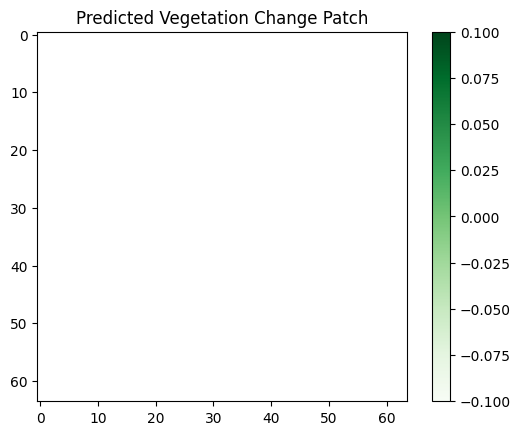

In [ ]:
pred = model.predict(X[0:1])
plt.imshow(pred[0, ..., 0], cmap='Greens')
plt.title("Predicted Vegetation Change Patch")
plt.colorbar()
plt.show()


In [ ]:
import pandas as pd
ndvi_mean = ndvi.mean(dim=['lat', 'lon'])
ndvi_series = ndvi_mean.to_series().dropna()
ndvi_series.index = pd.to_datetime(ndvi_series.index)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ndvi_scaled = scaler.fit_transform(ndvi_series.values.reshape(-1, 1))


In [ ]:
def create_sequences(data, seq_len=12):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

seq_len = 12  # 1 year (if monthly data)
X, y = create_sequences(ndvi_scaled, seq_len)


In [ ]:
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_lstm = models.Sequential([
    layers.Input(shape=(seq_len, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(32),
    layers.Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_lstm.fit(X, y, epochs=30, batch_size=16, validation_split=0.2)


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 261ms/step - loss: 0.2037 - val_loss: 0.1881
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1343 - val_loss: 0.1776
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1343 - val_loss: 0.1724
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1363 - val_loss: 0.1480
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1186 - val_loss: 0.1338
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0959 - val_loss: 0.1265
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0924 - val_loss: 0.1183
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0901 - val_loss: 0.1090
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0747 - val_loss: 0.0997
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0678 - val_loss: 0.0890
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0598 - val_loss: 0.0765
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0585 - val_loss: 0.0614


In [ ]:
last_seq = ndvi_scaled[-seq_len:].reshape(1, seq_len, 1)
predictions = []

for _ in range(12):  # predict next 12 steps
    pred = model_lstm.predict(last_seq)
    predictions.append(pred[0, 0])
    last_seq = np.append(last_seq[:, 1:, :], [[[pred[0, 0]]]], axis=1)

# Inverse transform to get real NDVI values
forecast_ndvi = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<ipython-input-35-a9dc2ab42368>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=ndvi_series.index[-1], periods=13, freq='M')[1:]


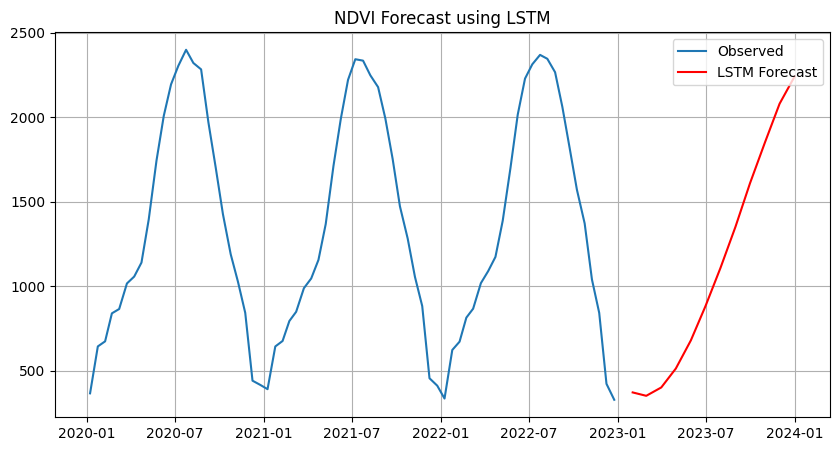

In [ ]:
import matplotlib.pyplot as plt
forecast_index = pd.date_range(start=ndvi_series.index[-1], periods=13, freq='M')[1:]

plt.figure(figsize=(10, 5))
plt.plot(ndvi_series, label='Observed')
plt.plot(forecast_index, forecast_ndvi, label='LSTM Forecast', color='red')
plt.title('NDVI Forecast using LSTM')
plt.grid()
plt.legend()
plt.show()


In [ ]:
forecast_df = pd.DataFrame({'Date': forecast_index, 'NDVI_LSTM_Prediction': forecast_ndvi.flatten()})
forecast_df.to_csv('/content/ndvi_lstm_forecast.csv', index=False)

from google.colab import files
files.download('/content/ndvi_lstm_forecast.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

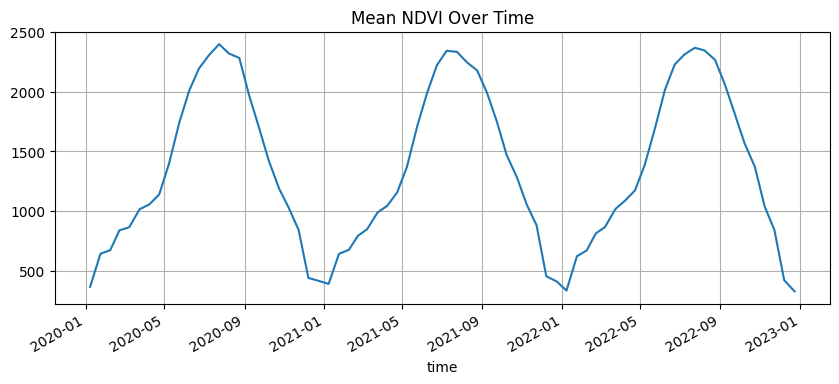

In [ ]:
ndvi_series = ndvi_mean.to_series().dropna()
ndvi_series.index = pd.to_datetime(ndvi_series.index)
ndvi_series.plot(figsize=(10, 4), title='Mean NDVI Over Time')
plt.grid()
